In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from importlib import reload
import scipy.interpolate as scint
import ternary

from datetime import datetime

import better_mob as bm
import pandas as pd

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [11]:
from importlib import reload
reload(bm)

<module 'better_mob' from '/home/cotton/Documents/ConfirmationThesis/makeFigs/CIPS_paper_scripts/better_mob.py'>

In [12]:
plt.rc('font', family='STIXGeneral')
r=(216,27,96)
r='#D81B60'
r='#ff6600' #changed to the new orange
r='#be0f34'
b=(30,136,229)
b='#1E88E5'
b='#1E88E5'
ob='#002147'
g=(0,77,64)
g='#004D40'
g='#007770'
y=(255,193,7)
y='#FFC107'
y='#f5cf47'

# top = np.array([np.array([255,193,7, 256])/256]*128)
# top = np.array([np.array([150,150,150,256])/256]*128)
# bottom = np.array([np.array([256,256,256,0])/256]*128)
# newcolors = np.vstack((top, bottom))
# newcolors = np.vstack((bottom, top))
# newcmp = ListedColormap(newcolors)
# plt.matshow(np.random.rand(25, 25), cmap=newcmp)

In [13]:
enz_star=0.15
del_mu=8.0
del_e=-5.0
k_spo=1.0
k_cat=1
Dpe=4.0
Dse=1.0
v_rat=20.0

phie0=0.15

#Additional Parameters for ternary
Dps=10
v_s = 1
v_w = v_s
Dew=10
Dsw=10
Dpw=10

In [14]:
k_cat_tanfile = './20210907180535_tangent.csv'
df = pd.read_csv(k_cat_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['k_cat','phi1mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi1mid': 'binod'})
vol2 = df[['k_cat','phi2mid']].copy().rename(columns={'k_cat': 'k_cat', 'phi2mid': 'binod'})
k_cat_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cks = scint.CubicSpline(k_cat_ordered['binod'], k_cat_ordered['k_cat'])

del_mu_tanfile = './20211122183752_tangent.csv'
df = pd.read_csv(del_mu_tanfile)
df['phi1mid'] = ((df['phiE1hi']+df['phiE1low'])/2)
df['phi2mid'] = (df['phiE2hi']+df['phiE2low'])/2
df = df[df['phiE1hi'] != 1]

vol1 = df[['del_mu','phi1mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi1mid': 'binod'})
vol2 = df[['del_mu','phi2mid']].copy().rename(columns={'del_mu': 'del_mu', 'phi2mid': 'binod'})
del_mu_ordered = pd.concat([vol1, vol2]).sort_values('binod')

cmus = scint.CubicSpline(del_mu_ordered['binod'], del_mu_ordered['del_mu'])

k_cats, enzs_k = np.meshgrid(np.arange(0.1, 1.9, .02), np.arange(0.0001, 0.4, 0.01))
del_mus, enzs_mu = np.meshgrid(np.arange(2, 10, .05), np.arange(0.0001, 0.4, 0.01))
enzx = np.arange(np.min(k_cat_ordered['binod']), np.max(k_cat_ordered['binod']), 0.001)

In [15]:
sys = [enz_star, del_mu, del_e, k_spo, k_cat, Dpe, Dse, v_rat]
sys_label = ['enz_star', 'del_mu', 'del_e', 'k_spo', 'k_cat', 'Dpe', 'Dse', 'v_rat']
title = ''
for lab, val in zip(sys_label, sys):
    if np.size(val) == 1:
        title += '{}: '.format(bm.labels[lab])
        title += '{0:.3g}, '.format(val)
title = title[:-2]

In [16]:
efile, sfile, pfile = './new5000e.txt', './new5000s.txt', './new5000p.txt',;
edata = np.genfromtxt(efile, delimiter=',')[1:, :]
sdata = np.genfromtxt(sfile, delimiter=',')[1:, :]
pdata = np.genfromtxt(pfile, delimiter=',')[1:, :]

Text(0.465, 0.08, 'Position')

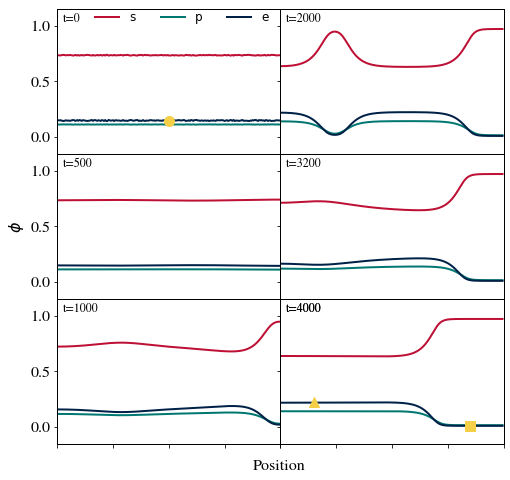

In [77]:
marksize = 100

frames = [0, 500, 1000, 2000, 3200, 4000]
hi_end, low_end = np.max(edata[frames[-1], :]), np.min(edata[frames[-1], :])

fig, axs = plt.subplots(3, 2, figsize=(8,8), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

#Plot Evolution of system
for ax, frame in zip(axs.transpose().flatten(), frames):
#     ax.plot(sdata[frame, :], r, label='$\mathrm{s}$')
#     ax.plot(pdata[frame, :], g, label='$\mathrm{p}$')
#     ax.plot(edata[frame, :], ob, label='$\mathrm{e}$')
#     ax.set_ylabel('$\phi$');
#     ax.set_xlabel('Position');
#     ax.set_ylim(-0.1, 1.2)
#     ax.set_xlim(0, 200)
#     ax.text(0.82, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', size=12)
#     ax.set_yticks([0, 0.5, 1]),sharex=True
#     ax.legend(ncol=3, loc='upper left', frameon=False)
# ###
# for ax, frame in zip([f1_ax3, f1_ax4, f1_ax5], frames):
    ax.plot(sdata[frame, :], r, label='$\mathrm{s}$', lw=2)
    ax.plot(pdata[frame, :], g, label='$\mathrm{p}$', lw=2)
    ax.plot(edata[frame, :], ob, label='$\mathrm{e}$', lw=2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_xlim(0, 200)
    ax.text(0.025, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='y', labelsize=16)
    [x.set_linewidth(1) for x in ax.spines.values()]
#     ,fontsize=16, fontweight='bold', va='top', ha='right')
axs[0, 0].legend(ncol=3, loc=(0.15, 0.85), frameon=False, fontsize=12)
axs[1, 0].set_ylabel('$\phi$', fontsize=16);
axs[1, 0].set_xlabel('Position', fontsize=16)
ax.text(0.025, 0.97, 't={}'.format(frame), transform=ax.transAxes, va='top', ha='left', fontsize=12)
###
# ax.set_xticks([])
#     ax.set_yticks([0, 1])

axs[0, 0].set_yticks([0, 0.5, 1])
axs[0, 0].tick_params(axis='y', labelsize=16)
axs[1, 0].set_yticks([0, 0.5, 1])
axs[1, 0].tick_params(axis='y', labelsize=16)
axs[2, 0].set_yticks([0, 0.5, 1])
axs[2, 0].tick_params(axis='y', labelsize=16)

axs[2, 0].set_xticks([0, 50, 100, 150, 200])
axs[2, 0].xaxis.set_ticklabels([])
axs[2, 0].tick_params(axis='y', labelsize=16)
axs[2, 1].set_xticks([0, 50, 100, 150, 200])
axs[2, 1].xaxis.set_ticklabels([])
axs[2, 1].tick_params(axis='y', labelsize=16)

axs[0, 0].scatter(100, enz_star, marker='o', s=marksize, alpha=1, c=y, zorder=10)
axs[2, 1].scatter(30, hi_end, marker='^', s=marksize, alpha=1, c=y, zorder=10)
axs[2, 1].scatter(170, low_end, marker='s', s=marksize, alpha=1, c=y, zorder=10)

fig.text(0.465, 0.08, 'Position', fontsize=16)

In [89]:
fig.savefig('../../figures/CIPSnumeric.pdf')

$\kcat$ with $\Delta\mu=8 k_{\rm B} T$ and (b) varying $\Delta \mu$ with $\kcat/\kspo=1$. (c) Numerical simulations showing the evolution of a uniform steady state with $\phie=0.15$ into two phase separated regions. The circle, triangle and square identify the homogeneous steady state and the dense and dilute enzyme phases, respectively, and are plotted in all other panels for comparison. (d) Stability diagram of a mixture including a water component, for $\Delta\mu=8 k_{\rm B} T$ and $\kcat/\kspo=1$. The darker and lighter shaded regions mark the spinodal regions for $\ve/\vs=20$ [also used in (a--c)] and $\ve/\vs=85$, respectively. Additional system parameters in (a--d) are $\Delta \varepsilon=-5 k_{\rm B} T$, $\Dpe=4 \Dse$, and $\Dps=10 \Dse$; in (d) $\Dew=\Dsw=\Dpw=10 \Dse$ and $\vw=\vs$.}

In [42]:
# Rs = kspo*exp(e)+kcat*phie
# Rp = kspo+kcat*phie*exp(-e-mu)
Rs = 1*np.exp(-5)+1*0.15
Rp = 1+1*0.15*np.exp(-(-5)-8)

print((1-0.15)*Rs/(Rs+Rp), (1-0.15)*Rp/(Rs+Rp))
# (noise is 0.1 on the enzyme and then proportionally to te remiaing. uniformly distributed)

0.11443615143632009 0.7355638485636798


e
0.154997731226948
0.145228596236256
0.009769134990691986
0.15011630520344427
s
0.739073520679191
0.731887698148299
0.00718582253089195
0.7354782986606264
p
0.115697883084553
0.113114570624753
0.002583312459800008
0.11440539613592932

2.7816311974310124
6.428702871556664


0.15011630520344427

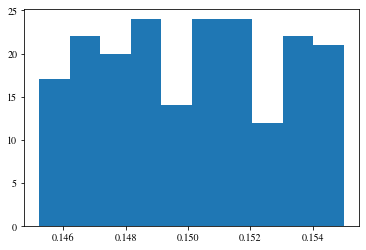

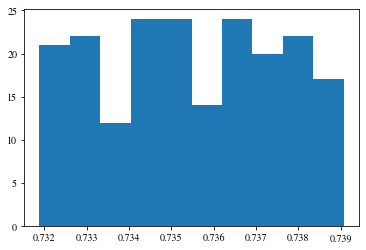

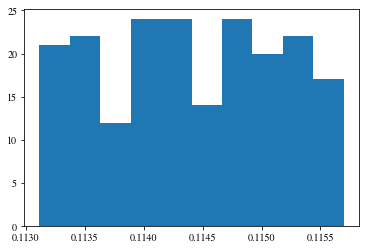

In [43]:
# check noise distribution
plt.figure()
plt.hist(edata[0, :])

plt.figure()
plt.hist(sdata[0, :])

plt.figure()
plt.hist(pdata[0, :])

for vardata, varlab in zip([edata, sdata, pdata], ['e', 's', 'p']):
    
    print(varlab)
    print(np.max(vardata[0, :]))
    print(np.min(vardata[0, :]))
    print(np.max(vardata[0, :]) - np.min(vardata[0, :]))
    print(np.mean(vardata[0, :]))

print()
print((np.max(sdata[0, :]) - np.min(sdata[0, :]))/(np.max(pdata[0, :]) - np.min(pdata[0, :])))
print(np.mean(sdata[0, :])/np.mean(pdata[0, :]))

np.sum(edata[0, :])/200

(array([17., 22., 20., 24., 14., 24., 24., 12., 22., 21.]),
 array([-0.0047714 , -0.00379449, -0.00281758, -0.00184066, -0.00086375,
         0.00011316,  0.00109008,  0.00206699,  0.0030439 ,  0.00402082,
         0.00499773]),
 <BarContainer object of 10 artists>)

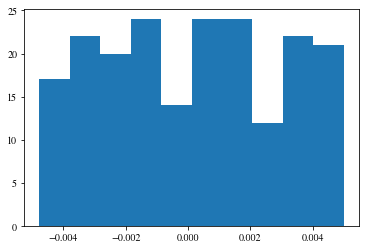

In [46]:
plt.hist(edata[0, :]-0.15)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


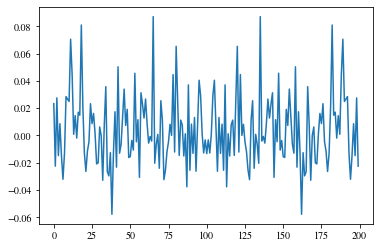

In [49]:
plt.plot(np.fft.fft(edata[0, :]-0.15))

(array([2.0000e+00, 0.0000e+00, 2.0000e+00, 8.0000e+00, 1.2000e+01,
        2.4000e+01, 2.6000e+01, 6.2000e+01, 1.1000e+02, 1.7000e+02,
        3.1200e+02, 4.3800e+02, 8.1200e+02, 1.1960e+03, 1.9160e+03,
        2.6880e+03, 4.3700e+03, 6.1520e+03, 8.5360e+03, 1.1564e+04,
        1.5126e+04, 1.9877e+04, 2.4860e+04, 3.0458e+04, 3.6466e+04,
        4.3066e+04, 4.9012e+04, 5.4710e+04, 5.8957e+04, 6.1592e+04,
        6.4356e+04, 6.4042e+04, 6.1800e+04, 5.9154e+04, 5.5114e+04,
        4.9786e+04, 4.3428e+04, 3.7424e+04, 3.1312e+04, 2.5440e+04,
        2.0100e+04, 1.5888e+04, 1.2000e+04, 8.8180e+03, 6.1920e+03,
        4.4020e+03, 2.9840e+03, 1.9640e+03, 1.2940e+03, 7.9200e+02,
        5.1400e+02, 2.7600e+02, 1.7200e+02, 1.1200e+02, 3.8000e+01,
        4.4000e+01, 1.8000e+01, 6.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([-101.77229429,  -98.49513236,  -95.21797043,  -91.9408085 ,
         -88.66364657,  -85.38648464,  -82.10932271,  -78.83216078,
         -75.55499885,  -72.27783692,  -69.000

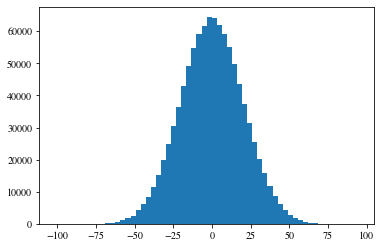

In [72]:
syn_noise = 0.1*(np.random.uniform(0, 1, 1000000)-0.5)

# plt.plot(syn_noise)
plt.hist(np.real(np.fft.fft(syn_noise)), bins=60)

In [62]:
# plt.plot(np.abs(np.fft.fft(syn_noise)))
np.fft.fft(syn_noise[0:3]), np.abs(np.fft.fft(syn_noise[0:3]))

(array([ 0.01374849+0.j        , -0.04231797+0.04097466j,
        -0.04231797-0.04097466j]),
 array([0.01374849, 0.05890444, 0.05890444]))